# Predictive Maintenance 

### Student: Rodolfo Lerma

This assignment covers the topic of predictive maintenance. Predictive Maintenance problems adress predicting when a machine needs to be maintained ahead of breaking down. This problem can occur anywhere regular maintenance is required for a machine. For example, it can be used in manufacturing, fleet operations, train maintenance, etc.

This assignment will use the [Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset). The dataset consists of 10 000 data points stored as rows with 14 features in columns. The 'machine failure' label that indicates, whether the machine has failed in this particular datapoint.

# Learning Objectives
- Perform model tuning based on hyper parameters.
- Select the best model after attempting multiple models.
- Perform recursive feature elimination, producing a statistically significant improvement over a model without feature selection.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

ai4i2020 = pd.read_csv('ai4i2020.csv')
print(ai4i2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
UDI                        10000 non-null int64
Product ID                 10000 non-null object
Type                       10000 non-null object
Air temperature [K]        10000 non-null object
Process temperature [K]    10000 non-null object
Rotational speed [rpm]     10000 non-null int64
Torque [Nm]                10000 non-null float64
Tool wear [min]            10000 non-null int64
Machine failure            10000 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB
None


In [2]:
ai4i2020.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0
9,10,M14869,M,298.5,309,1741,28.0,21,0


In [3]:
ai4i2020.shape

(10000, 9)

In [4]:
ai4i2020.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]         object
Process temperature [K]     object
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

## Question 1.1:  Write a command that will calculate the number of unique values for each feature in the training data.

In [5]:
columns_names = ai4i2020.columns.to_list()
updated_columns = columns_names.copy()
updated_columns.remove("UDI")
updated_columns.remove("Product ID")

for i in updated_columns:
    unique_values = ai4i2020[i].value_counts(dropna=False)
    print(' ')
    print('****************')
    print(' ')
    print(unique_values)

 
****************
 
L    6000
M    2997
H    1003
Name: Type, dtype: int64
 
****************
 
300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
300.6    216
298.2    208
302.3    203
300.4    198
297.5    198
300.8    196
298.1    188
300.3    188
298      184
300.2    182
299      177
298.3    175
300.9    166
302.2    166
300.1    164
298.4    159
297.3    155
301      155
302.4    151
301.5    150
299.1    150
297.6    148
298.6    147
297.9    146
299.2    145
        ... 
296.8     61
297       61
303       60
302.9     59
303.9     58
303.3     57
302.8     57
304.1     46
304       45
304.2     40
295.6     38
303.1     38
296.7     37
296.6     30
296.3     28
296.2     26
303.2     23
295.8     19
295.5     18
295.7     18
296.4     17
296.5     17
304.3     15
296.1     12
295.9     10
304.4      7
296        6
295.3      3
295.4      3
304.5      1
Name: Air temperature [K], Length: 93, dtype: int64
 
****************
 
310.6    317
310.8    273
310.7    26

In [6]:
print('Number of Unique Values per Column')
print(' ')
for i in columns_names:
    unique = ai4i2020[i].nunique()
    print(i)
    print(unique)
    print(' ')
    print('************')

Number of Unique Values per Column
 
UDI
10000
 
************
Product ID
10000
 
************
Type
3
 
************
Air temperature [K]
93
 
************
Process temperature [K]
82
 
************
Rotational speed [rpm]
941
 
************
Torque [Nm]
577
 
************
Tool wear [min]
246
 
************
Machine failure
2
 
************


## Question 1.2: Determine if the data contains any missing values, and replace the values with np.nan. Missing values would be '?'.

In [7]:
ai4i2020.replace('?', np.nan, inplace=True)

In [8]:
ai4i2020.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

UDI                          0
Product ID                   0
Type                         0
Air temperature [K]        140
Process temperature [K]    183
Rotational speed [rpm]       0
Torque [Nm]                  0
Tool wear [min]              0
Machine failure              0
dtype: int64

## Question 1.3: Replace all missing values with the mean. Change column types to numeric.

In [9]:
#replace missing values with their mode
import statistics as st
sample_columns = ['Air temperature [K]','Process temperature [K]']
for i in sample_columns:
    ai4i2020[i] = pd.to_numeric(ai4i2020[i])
    ai4i2020[i].fillna(np.mean(ai4i2020[i]), inplace=True)

## Question 1.4: Drop UDI and 'Product ID' from the data

In [10]:
ai4i2020.drop(columns=['UDI', 'Product ID'], inplace=True)
ai4i2020.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


## Question 2.2: Apply [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to data. Make sure to Fit the training data and transform both training and test data. 

In [11]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder(sparse=False)
x = ai4i2020['Type'].values.reshape(-1, 1)
ai4i2020_hot = hot_encoder.fit_transform(x)

#The names of the values/categories
column_names = hot_encoder.categories_

In [12]:
for i in range(3):
    ai4i2020[column_names[0][i]] = ai4i2020_hot[:,i].tolist()

In [13]:
ai4i2020.drop(columns=['Type'], inplace = True)

## Question 2.1: Split the data into training and testing taking into consideration 'Machine failure' as the target (y)

In [14]:
columns_no_target = ai4i2020.columns.to_list()
columns_no_target.remove('Machine failure')

features = ai4i2020[columns_no_target]
target = ai4i2020['Machine failure']

#First split the Training/Validation and the Testing Set
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)

## Question 2.3: Apply [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to the training data since there is class imbalance.

In [15]:
y_train_val.value_counts()

0    7722
1     278
Name: Machine failure, dtype: int64

It is possible to see there is a class imbalance

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
variables_res, label_res = sm.fit_resample(X_train_val, y_train_val)
label_res.value_counts()

1    7722
0    7722
Name: Machine failure, dtype: int64

In [17]:
#Then split the Training/Validation into the Training and the Validation set
X_train, X_test, y_train, y_test = train_test_split(variables_res, label_res, test_size=0.2, random_state=42)

## Question 3.1: Train five machine learning [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) based on the training data, and evaluate their performance on the test dataset. Use default hyperparameter values.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [19]:
from sklearn.metrics import *
def ROM_plots(T,y):
    # ROC analysis
    LW = 2.0 # line width for plots
    LL = "lower right" # legend location
    LC = 'orange' # Line Color
    fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2))
    plt.figure()
    plt.title('Receiver Operating Characteristic curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPT')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
    plt.legend(loc=LL)
    plt.show()
    print ("\nAUC score (using auc function):", np.round(AUC, 2))
    print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")

In [20]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print(" ")
    print("#############Classifier: " + header + " #############")
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        #proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        #y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        #f1_score.append(F1)
        #ROM_plots(T,y)
    
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()

## Question 3.1: Train five machine learning [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) based on the training data, and evaluate their performance on the test dataset. Use default hyperparameter values.

In [21]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors
lrc = LogisticRegression() #Logistic Regression
dtc = DecisionTreeClassifier() #DecisionTree
rfc = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss) #Random Forest
svc = SVC(gamma='auto') #Support Vector Classification

#List for Classifiers and Names
header = ["KNN","Logistic_Regression","Decision_Tree","Random_Forest","SVC"]

V = [knn,lrc,dtc,rfc,svc]



#############\Classifier: #############
 K_Nearest_Neighbors


Confusion matrix:
 [[1491   30]
 [ 189 1379]]

TP, TN, FP, FN: 1379 , 1491 , 30 , 189

Accuracy: 0.9291 ,Error Rate: 0.0709 ,Precision: 0.9787 ,Recall: 0.8795 ,F1 Score: 0.9264


#############\Classifier: #############
 Logistic_Regression


Confusion matrix:
 [[1287  234]
 [ 278 1290]]

TP, TN, FP, FN: 1290 , 1287 , 234 , 278

Accuracy: 0.8343 ,Error Rate: 0.1657 ,Precision: 0.8465 ,Recall: 0.8227 ,F1 Score: 0.8344


#############\Classifier: #############
 Decision_Tree


Confusion matrix:
 [[1478   43]
 [  49 1519]]

TP, TN, FP, FN: 1519 , 1478 , 43 , 49

Accuracy: 0.9702 ,Error Rate: 0.0298 ,Precision: 0.9725 ,Recall: 0.9688 ,F1 Score: 0.9706


#############\Classifier: #############
 Random_Forest


Confusion matrix:
 [[1506   15]
 [  39 1529]]

TP, TN, FP, FN: 1529 , 1506 , 15 , 39

Accuracy: 0.9825 ,Error Rate: 0.0175 ,Precision: 0.9903 ,Recall: 0.9751 ,F1 Score: 0.9826


#############\Classifier: #############
 Su

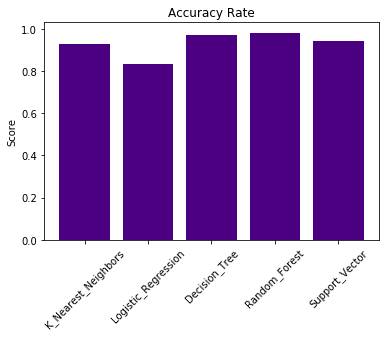

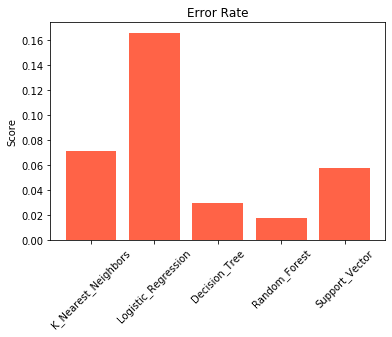

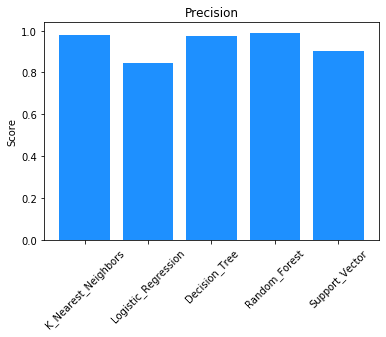

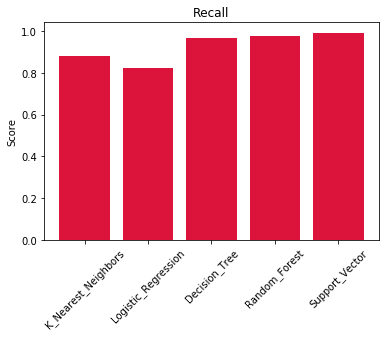

ValueError: shape mismatch: objects cannot be broadcast to a single shape

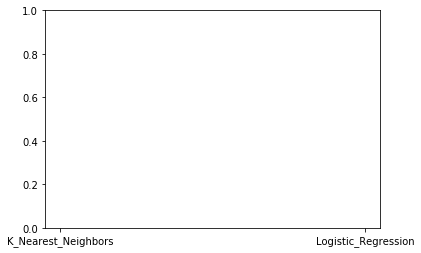

In [22]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train, X_test, y_train, y_test)

In [ ]:
# #Build models (You can either do it combined or separate)
# models = {'Logistic Regresion': LogisticRegression(), 'Support Vector Machine': SVC(), 'K-NN': KNeighborsClassifier(), 'Decision Tree':DecisionTreeClassifier(),'XGBoost': XGBClassifier()}

## Questions 3.2:  Perform recursive feature elimination (3 features) on the dataset using a logistic regression classifier with max_iter= 1000, random_state=5.  Any difference in the results? Explain.

In [23]:
from sklearn.feature_selection import RFE

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Accuracy: 0.5872450631272257
AUC: 0.671841665660347


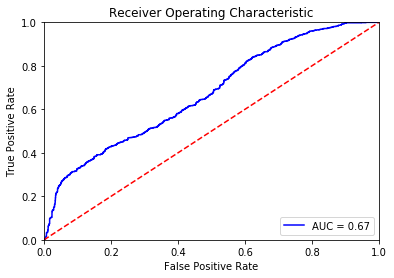

In [24]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Q.4. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:
What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work. 